In [2]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 34.7 MB/s eta 0:00:001m24.2 MB/s eta 0:00:01


In [4]:
!pip install seaborn


In [66]:
print("Columns:", df.columns.tolist())

Columns: ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']


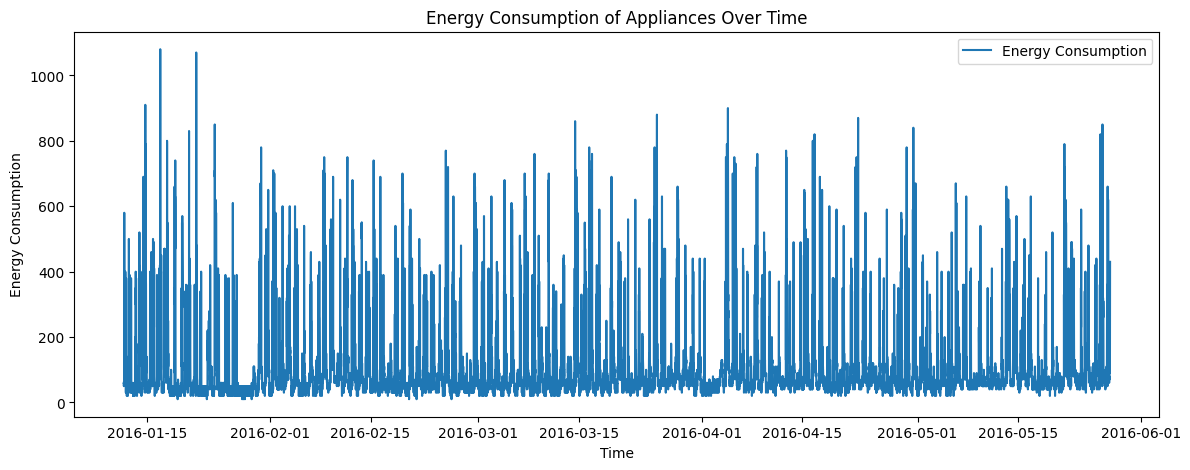

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("energydata_complete.csv", parse_dates=['date'])
df.set_index('date', inplace=True)
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Appliances'], label='Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption of Appliances Over Time')
plt.legend()
plt.show()


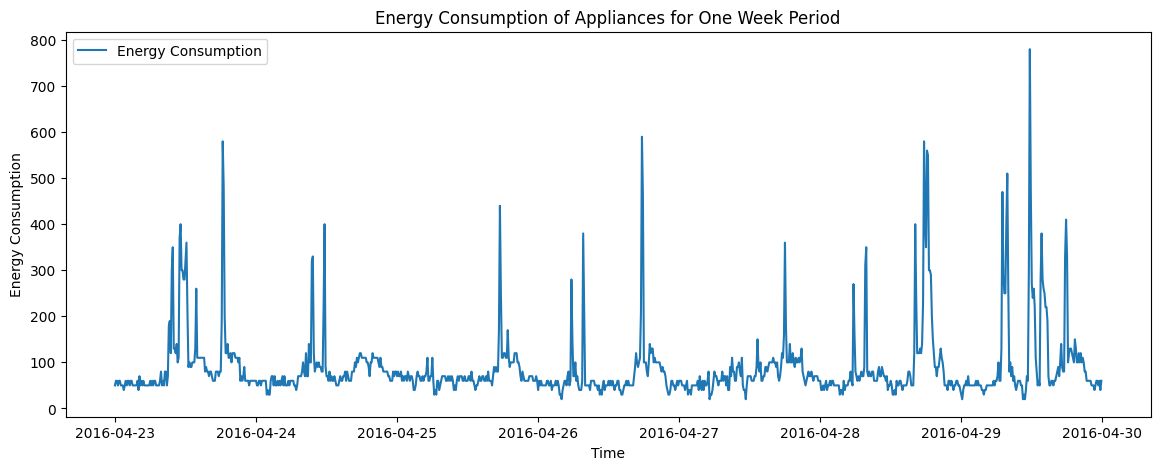

In [15]:
one_week_data = df.loc['2016-04-23':'2016-04-29'].copy()
plt.figure(figsize=(14, 5))
plt.plot(one_week_data.index, one_week_data['Appliances'], label='Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption of Appliances for One Week Period')
plt.legend()
plt.show()

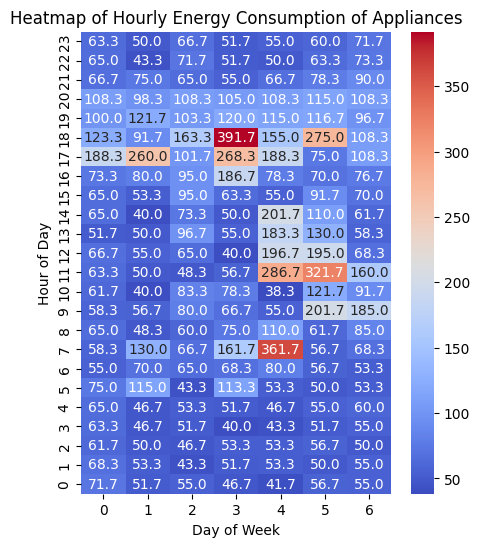

In [31]:
one_week_data['Hour'] = one_week_data.index.hour
one_week_data['Day'] = one_week_data.index.dayofweek
heatmap_data = one_week_data.pivot_table(values='Appliances', index='Hour', columns='Day', aggfunc="mean")
heatmap_data = heatmap_data.iloc[::-1, :]
plt.figure(figsize=(5, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f")
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.title('Heatmap of Hourly Energy Consumption of Appliances')
plt.show()

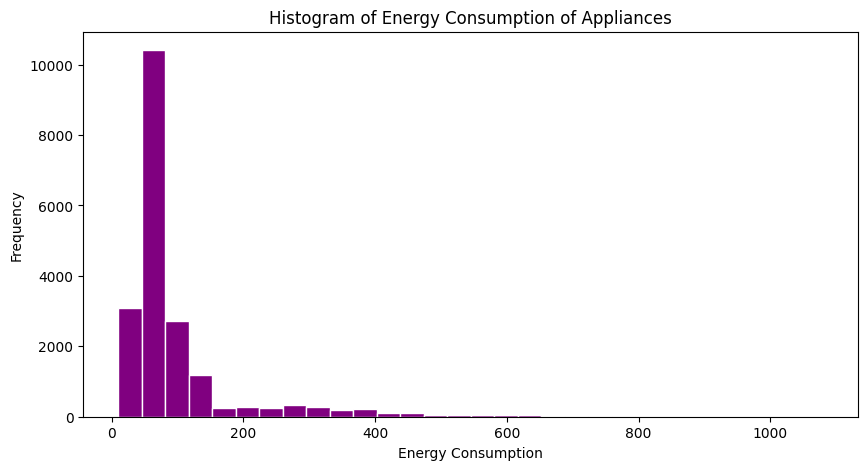

In [65]:
plt.figure(figsize=(10, 5))
plt.hist(df['Appliances'], bins=30, color='purple', edgecolor='white')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

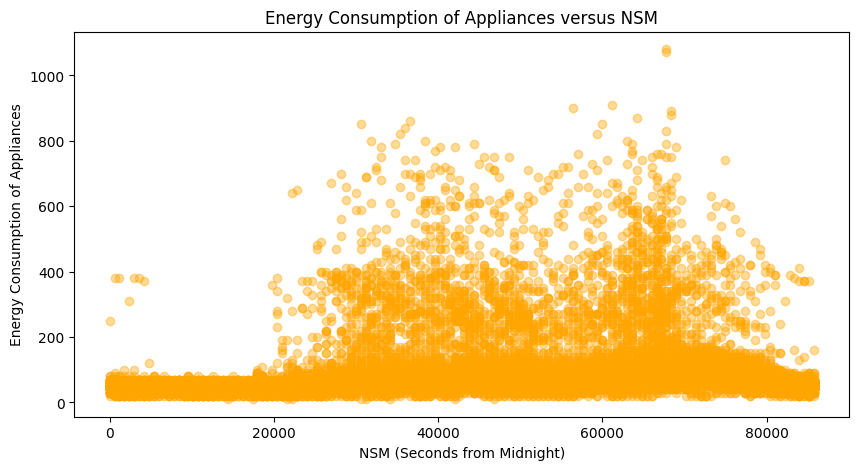

In [64]:
df['NSM'] = df.index.hour * 3600 + df.index.minute * 60 + df.index.second
plt.figure(figsize=(10, 5))
plt.scatter(df['NSM'], df['Appliances'], alpha=0.4, color='orange')
plt.xlabel('NSM (Seconds from Midnight)')
plt.ylabel('Energy Consumption of Appliances')
plt.title('Energy Consumption of Appliances versus NSM')
plt.show()

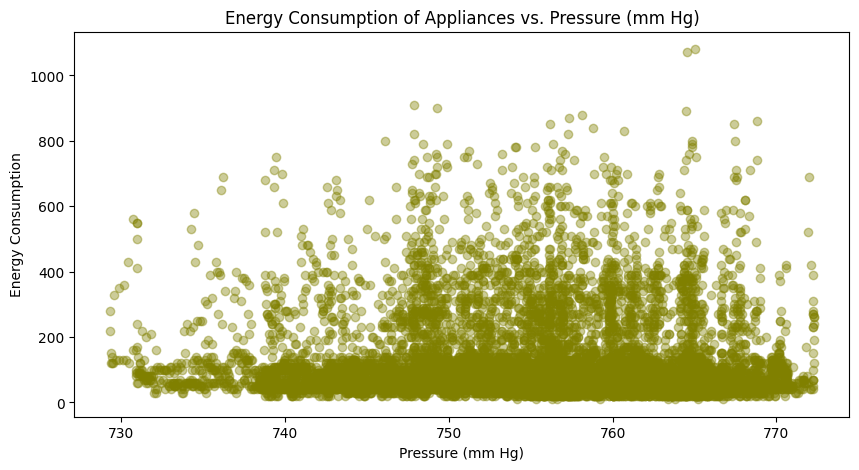

In [60]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.4, color='olive')
plt.xlabel('Pressure (mm Hg)')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption of Appliances vs. Pressure (mm Hg)')
plt.show()

In [63]:
print("Observations:")
print("- The Number of Seconds from Midnight (NSM) shows a clear trend which indicated that energy usage patterns depend on time.")
print("- Pressure (mm Hg) might have some correlation with energy consumption but needs further statistical analysis.")

Observations:
- The Number of Seconds from Midnight (NSM) shows a clear trend which indicated that energy usage patterns depend on time.
- Pressure (mm Hg) might have some correlation with energy consumption but needs further statistical analysis.
